# **This is tutorial on Perceptrons and Classifications**

You will learn how to implement the perceptron for linear regression, linear classification and how to build nonlinear kernels

I will add some theory so that you have better understanding how to implement the perceptron model.

## **Basic concepts**

### **Linear equation, or Linear Kernel**

Overall, you can write any linear equation in this form:

$y = \sum_{i=1}^D w_ix_i + b$

Here, $D$ is a length of a vector, so called dimension. If D = 1, $y = w*x+b$. If D=2 $y = w_1*x_1 + w_2*x_2 + b$ and so on. 

You can write this model in vector form:

$y = K(\bar{x} | \bar{w},b)) = \bar{w}^T\bar{x} + b$

Here, $T$ is a transposition operator. $\bar{w}$ and $\bar{x}$ are vectros of the same size such that $\bar{w} = [w_1,w_2,w_3, .. , w_D]$ and $\bar{x} = [x_1,x_2,x_3, .. , x_D]$. So, $\bar{w}^T\bar{x}$ is an inner product between vectors and return a scalar. K(x | w,b) means kernel given weights "w" and bias "b". Alternatively, we can say $K(\bar{x} | \bar{w},b)) == K(\bar{x}) $. It doesn't mean that weight and bias disappeared. It is just hidden for convinience, but its always there. 

Derivatives of the $y$:

## $\frac{\partial y}{\partial b} = 1$

## $\frac{\partial y }{\partial w_i} = x_i$ 

or, in a vector form:

## $\frac{\partial y }{\partial \bar{w}} =[\frac{\partial y }{\partial w_1},\frac{\partial y }{\partial w_2},..,\frac{\partial y }{\partial w_D} ] = \bar{x} = [x_1,x_2, .. , x_D]$

### **Sigmoid function**

Sigmoid function is very easy to express. 

## $ \sigma(x) = \frac{1}{1+e^{-x}}$

Here are properties of the sigmoid function:

1.   sigmoid function maps all numbers in real line $(-\infty,\infty)$ to the numbers in range $(0,1)$. Also, number 0 is mapped to 0.5.
2.   Derivative of the sigmoid function:

## $ \frac{\partial\sigma(x)}{\partial x} = \sigma(x)(1-\sigma(x))$ 

Above equation means that if you know the value $\sigma(x)$ you can implement derivative of the function just by computing above equation. 

### **Cross entropy**

general equation for cross entropy is:

$CE(\bar{p},\bar{q}) = - \sum_{i=1}^N p_i * log(q_i)$

Cross entropy is a measure of similarity between probability distribution $\bar{p}$ and $\bar{q}$. If $p$ and $q$ very similar, then $CE$ will be higher, if they are different $CE$ will be lower.

For binary classification, you can compute cross entropy even simpler:

$CE(Y,f(X)) = - \sum_{i=1}^N [ y_i log(f(x_i)) + (1-y_i)log(1 - f(x_i) ) ]$

Keep in mind that N is number of points in training set, therefore $Y = [y_1,y_2,..y_N]$ and $ X = [\bar{x}_1,\bar{x}_2, ..,\bar{x}_N]$. Also, note that elements of $X$ are vectors and not scalars, so, dimension of $Y$ is $N$ and dimension of $X$ is $N*D$. K(x) - is a kernel. Simplest kernel is linear function. 

Loss is negative of cross entropy:

$Loss(Y,f(x)) = - CE(Y,f(x))$

remember that:

$\max CE(Y,f(x)) = \min Loss(Y,f(x))$ 

It means, if you try to make $Y$ and $f(X)$ similar probability functions (maximize cross entropy), then you have to minimize the loss.

Derivative of the loss function with respect to optimization parameter $b$ is:

## $\frac{\partial Loss(Y,f(x))}{\partial b} = \sum_{i=1}^N [ \frac{y_i}{f(x_i)} - \frac{1-y_i}{1 - f(x_i) } ]\frac{\partial f(x_i)}{\partial b}$

There are 2 reasons why use Loss over cross entropy:
1. You remove the negative sign of the equation of $CE$ function.
2. You will think of *minimizing* some function over maximizing. Because in regression we minimize error. In classification we minimize loss (same as saying to maximize the cross entropy)


## **Introduction to backpropogation**

### **Chain rule**

Observe this effect:

## $\frac{\partial f(g(x))}{\partial x} = \frac{\partial f}{ \partial g} * \frac{\partial g}{\partial x}$

Why this is usefull?
This is how you can compute the derivative of the sigmoid activated linear function:
## $\frac{ \partial \sigma (K(\bar{x}))}{\partial w} = 
\frac{\partial \sigma(K(\bar{x}))}{\partial K(\bar{x})} * \frac{\partial K(x)}{\partial w} = $

### $ = [\sigma(K(\bar{x}))(1 - \sigma(K(\bar{x}))]*\bar{x}$

First part of the above equation is scalar (sigmoid derivative), second part is vector (derivative of linear kernel with respect to weights. 

### **Idea behind backpropogation is this**

You might already see that when you compute the derivative, you need to compute the kernel and sigmoid. If you store this values, when you ***run*** your model once, you can save them to use later for computing derivatives. How to find derivatives, then? Here is simple algorithm:

if you have a model F(G(H(x))):

1. Find the values h = H(x), g = G(h), f = F(g). Store h,g,f. 
2. Use values of h,g,f to compute values of $ \partial F / \partial x$ . 

Step (1) is called forward propogation.
Step (2) is called backward propogation.

## **Learning Step, or Optimization with Gradient Decent**

In order to find the values that minimize the loss or error, we need to find a condition, where our loss or error is minimum. From calculus, you know that its a point where gradient is zero. 


Unfortunately, you can not find the explicit equation for zero gradient of binary classifier loss function. You can try as exercise to show why (don't spend too much time, its impossible)

There are however, algorithms to find the minimum of the function, if you can find the gradient of the function. Its called gradient decent optimization. Why? Here is why:

1. Gradient of any function $f(w)$ is a tangent line to the function. 
2. If gradient is positive for value  $w$ function is increasing
3. If gradient is negative for value $w$ function is decreasing.
4. If function has a minimum, then around such minimum, as value of $x$ increases, function first decreases, then derivative is equal to zero, then function is increases. 
5. Therefore, if gradient is negative, we need to go to positive direction with respect to $w$, to minimize the function
6. If gradient is positive, then we need to go to negative direction. 

Numerically, we can *** update*** our function with the folowing law:

> $w_0 =$ any random number

> while gradient of $f(w_k)$ is not 0 do:

>> ## $w_{k+1} = w_{k} - \lambda\frac{\partial f(w_k)}{\partial w_k} $


$k$ - is a step of the loop, so it means time. Here, $\lambda$ is step size, normally, you choose $0 < \lambda < 1$. You need to choose $\lambda$ small enough to ensure optimization. If you let $\lambda$ too big, it will not decrease the function $f(w)$. 

## **To wrap it up!**

1. You want to find kernel $K(\bar{x} | w,b)$ such that it will minimize cross entropy. Remeber, that cross entropy, loss and error function are function of weights and biases.
2. You can take derivatve of loss using chain ruel. 
3. You can find both derivative and output of the model using forward and backward propogation
4. To optimize the model, you use gradient decent algorithm.



# 2. **Working with data.** 

Here, we will generate linearly separable data for classification task. 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


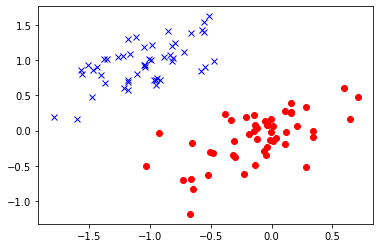

In [ ]:
import numpy as np # this is a library for working with matrix and vectors
from matplotlib import pyplot as plt # this is for plotting the results
import copy
N = 100
mean1 = [-1.0, 1.0]
mean2 = [0.0, 0.0]
cov = [[0.15 ,0.1 ],[0.1, 0.15]] # needs to be changed
X = np.concatenate((np.random.multivariate_normal(mean1,cov,size = int(N/2)),
                    np.random.multivariate_normal(mean2,cov,size = int(N/2)))) # points

Y = np.concatenate((np.ones(int(N/2)),
                    np.zeros(int(N/2))))  # Labels

print(Y) # look at Y to see what is going on
# plot the values 
def plotdata(plt,X,Y):
  for (x,y) in zip(X,Y):
    if (y>0):
      plt.plot(x[0],x[1],'bx')
    else:
      plt.plot(x[0],x[1],'ro')

plotdata(plt,X,Y)
plt.show()

[0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 0. 0. 1.]


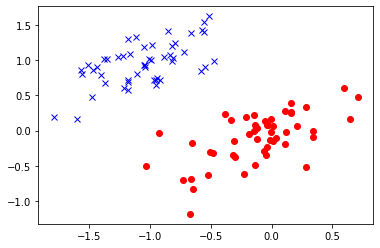

In [ ]:
import random
# we need to shuffle them
index = list(range(len(Y)))
random.shuffle(index)

# we are shuffling both Y and X so that they preserve index
L = list(zip(X,Y))

random.shuffle(L)

X,Y = zip(*L)
X = np.array(X)
Y = np.array(Y)

print(Y) # look at how the values are shuffled

# plot the values 
plotdata(plt,X,Y)
plt.show()

# 3. **Implementation of Linear classifier**

Here, I will show how to implement linear classifier that runs on your CPU. The implementation is very similar to pytorch, so you will understand better on what is going on inside each class. However, keep in mind that this is not how pytorch impelemnts anything. I did it so that you have intuition, on things pretty fast. 

In [ ]:
# Base class for any model
class Node:
  def __init__(self,):
    self._w = {"weight":None, "grad": None} # weight have a value and gradient
    self._b = {"weight":None, "grad": None} # bias also have value and gradient
    self._node_out = None

  def set_weight(self,w): # sets weights
    self._w["weight"] = w 

  def set_bias(self,b): # sets bias
    self._b["bias"] = b

  def get_weight(self,): # gets weight
    return self._w
  def get_bias(self,): # gets bias
    return self._b
  def weight_bias(self,): # gets both weight and bias
    return self._w, self._b
  
  def get_out(self,): # gets output of the node
    return self._node_out
  
  def zero_grad(self,): # sets gradient of the weight and bias to zero
    self._w["grad"] = np.zeros(self._w["grad"].shape)
    self._b["grad"] = 0
  
  def forward(self,x): # forward propogation
    return self.node_out # does nothing, just return the value of output for base class
  
  def backward(self): # back propogation
    return self._w, self.b # return derivative with respect to weights and biases, base class has no derivative
  
  def __call__(self,x):
    return self.forward(x)


## Linear kernel is child of base class
class LinearKernel(Node):
  def __init__(self, dimension = 1):
    super(LinearKernel,self).__init__()
    self._w = {"weight": np.random.rand(dimension), "grad": np.zeros(dimension)} # initialize w_0 to random gradient to zero
    self._b = {"bias": np.random.rand(), "grad": 0} # initialize b_0 to random 
    self._node_out = []  # input to the linear kernel is batch of the data of form [x_1,x_2,x_3, .. x_N]
    self._X = None # to store the data batch

  def forward(self,x):
    self.zero_grad() # you have to make sure that gradients are not set
    self._X = copy.deepcopy(x) # you will need this for gradient in backward pass
    if(len(x.shape)<2):
      print("input is not correct") # data should be at least of the form [x_1,x_2], where x_1 is a numpy array
      return "-1"
    for elem in x: # for each element in input batch, return the calculate the node values
      # IMPLEMENT THIS ----

      # END OF IMPLEMENTATION ---- 
    return np.array(self._node_out) # this is output, be carefull to set the proper values in implementation

  def backward(self,):
    # IMPLEMENT THIS, should return error, if forward was not called and output is not updated
    
    # END OF IMPLEMENTATION
    self._node_out = [] # set the values to empty list

## sigmoid is child of base class
class Sigmoid(Node):
  def __init__(self, kernel = None):
    super(Sigmoid,self).__init__()
    
    # THROW ERROR if kernel is empty !

    self._kernel = kernel # this might be any kernel object

    ## don't forget to properly initialize weight, bias and initial value for outpu. 
    ## bias and weights are just passed from the kernel. You should keep in mind that
    ## when bias and weight of the kernel is updated, the bias and weight of sigmoid is also updated.
    

  def forward(self,x):
    #IMPLEMENT THIS!!

    # END OF IMPLEMENTATION
  
  def backward(self,):
    # IMPLEMENT THIS!!!, should return error, if forward was not called and output is not updated
    
    # END OF IMPLEMENTATION


## cross entropy Loss is child of base class
class Loss(Node):
  def __init__(self, function: Node):
    super(Loss,self).__init__()
    
    # throw error if function is empty !

    self._function = function # this might be any kernel object or activation function!!!
    
    ## DON'T FORGET!!!! to properly initialize weight, bias and initial value for output!
    

  def forward(self,x):
    X = x[1] # this is not trivial, but you should be passing the both data point X and label Y to the model
    Y = x[0] # this is a lazy way to make it work
    self._Y = Y
    #IMPLEMENT THIS!

    # END OF IMPLEMENTATION!

  def backward(self,):
    # IMPLEMENT THIS!!! , should return error, if forward was not called and output is not updated
    
    # END OF IMPLEMENTATION


# optimizer is not same as  base class. 
class Optimizer:
  def __init__(self, weight = None, bias = None, lr = 0.001):
    self._weight = weight # weigh
    self._bias = bias # bias
    self._lamda = lr # learning rate or learning step size
  
  def update(self,): # THIS FUNCTION UPDATED WEIGHTS, AFTER GRADIENT IS COMPUTET PROPERLY!
    # IMPLEMENT THIS!!!

    # this function updates weights. You need to implement it properly
    
    # END OF IMPLEMENTATION!

In [ ]:
def plot_2d_line(plt,linearK):
  x = np.array([0.1*i for i in range(-50,50)])
  w = linearK.get_weight()["weight"]
  bias = linearK.get_bias()["bias"]
  if(abs(w[1])<1e-8):
    w[1]=1
  a = -w[0]/w[1]
  b = -bias/w[1]
  y = a*x - b
  plt.plot(x,y,'k-')

In [ ]:
# do not change this part
linear = LinearKernel(2) # initialize linear kernel with x1 and x2 
linear.set_weight([1,1]) # set initial weights to 1,1
linear.set_bias(-1)      # set bias to -1
sigma = Sigmoid(linear)  # y = sigma(w1*x1 + w2*x2 + b)
loss = Loss(sigma)       #  CROSS ENTROPY LOSS FUNCTION 
optimizer = Optimizer(loss.get_weight(),loss.get_bias(),lr = 0.01) # MODEL UPDATES THE WEIGHTS AND BIASES with step size 0.01!!



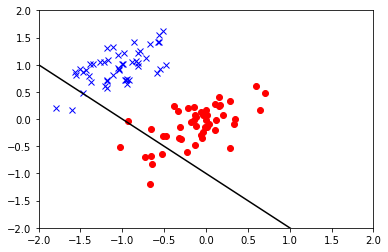

In [ ]:
# do no change this part
plotdata(plt,X,Y)
plot_2d_line(plt,linear)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()

# this graph you shoud show the 2d line and linear data, if you do everything properly

In [ ]:
# do no change this part this is main training loop
for i in range(100): # you train for 100 steps
  l = loss([Y,X]) # forward and compute the loss
  
  if i%10 ==9:
    print("step:",i," loss: ",l) # evey 10 steps, print the loss, loss should be decreasing
  
  loss.backward() # backpropogate the error
  optimizer.update() # update the weights with gradient decent


print(loss.get_bias()) # print biases
print(loss.get_weight()) # print weight



# WHAT YOU SEE BELOW IS EXAMPLE OF THE LEARNING

step: 9  loss:  -82.68679846246137
step: 19  loss:  -90.25175900997746
step: 29  loss:  -97.81671958109517
step: 39  loss:  -105.38168016093881
step: 49  loss:  -112.9466407440086
step: 59  loss:  -120.51160132827118
step: 69  loss:  -128.07656191297477
step: 79  loss:  -135.64152249784135
step: 89  loss:  -143.2064830827682
step: 99  loss:  -150.77144366771742
{'bias': -100.78494076247758, 'grad': array(50.)}
{'weight': array([105.93157934, -94.7364643 ]), 'grad': array([-52.56239449,  47.98078021])}


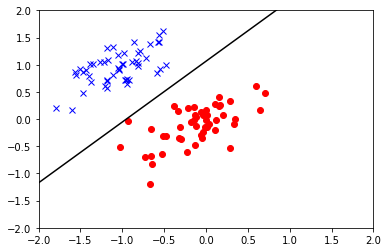

In [ ]:
# do no change this part
plotdata(plt,X,Y)
plot_2d_line(plt,linear)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()

# this graph you shoud uptain, if you do everything properly

## Final Exercise

1. Now, generate points such that if x1^2+x2^2 < 1 they are y = 1 and y = 0 otherwise
2. Use linear kernel of dimension 5 , but generate data such that each $\bar{x} = [x_1, x_2, x_1x_2, x_1^2, x_2^2]$ 
3. Run optimization and check if the model could train in such case.